In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [38]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print(df.head())


Saving titanic.csv to titanic (3).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0         

In [39]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [40]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [41]:
a = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
b = df['Survived']

In [42]:
scaler = StandardScaler()
a_scaled = scaler.fit_transform(a)
a_train, a_test, b_train, b_test = train_test_split(a_scaled, b, test_size=0.2, random_state=1)

In [43]:
model = LogisticRegression()
model.fit(a_train, b_train)


LogisticRegression()

In [44]:
b_pred = model.predict(a_test)


In [45]:
accuracy = accuracy_score(b_test, b_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 79.89 %


In [46]:
print("Confusion Matrix:")
print(confusion_matrix(b_test, b_pred))
print("\nClassification Report:")
print(classification_report(b_test, b_pred))

Confusion Matrix:
[[89 17]
 [19 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       106
           1       0.76      0.74      0.75        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



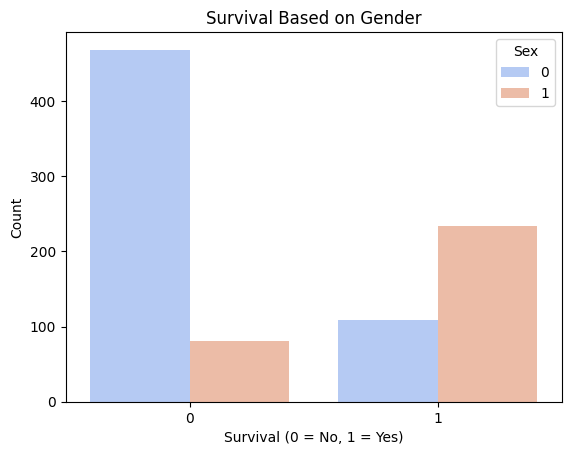

In [47]:
sns.countplot(x='Survived', hue='Sex', data=df, palette='coolwarm')
plt.title("Survival Based on Gender")
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title='Sex')
plt.show()